In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from function import *
from sklearn.preprocessing import StandardScaler
import numpy as np
import skfuzzy as fuzz

In [ ]:
# load data
file_path = 'forestfires.csv'
df = pd.read_csv(file_path)
small_data = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH']]
for col in small_data.columns:
    small_data.loc[:, col] = normalization_zscore(small_data[col])

print(small_data.shape)

(517, 6)


##### a) Visualize the data over these features in 2D/3D PC plane 

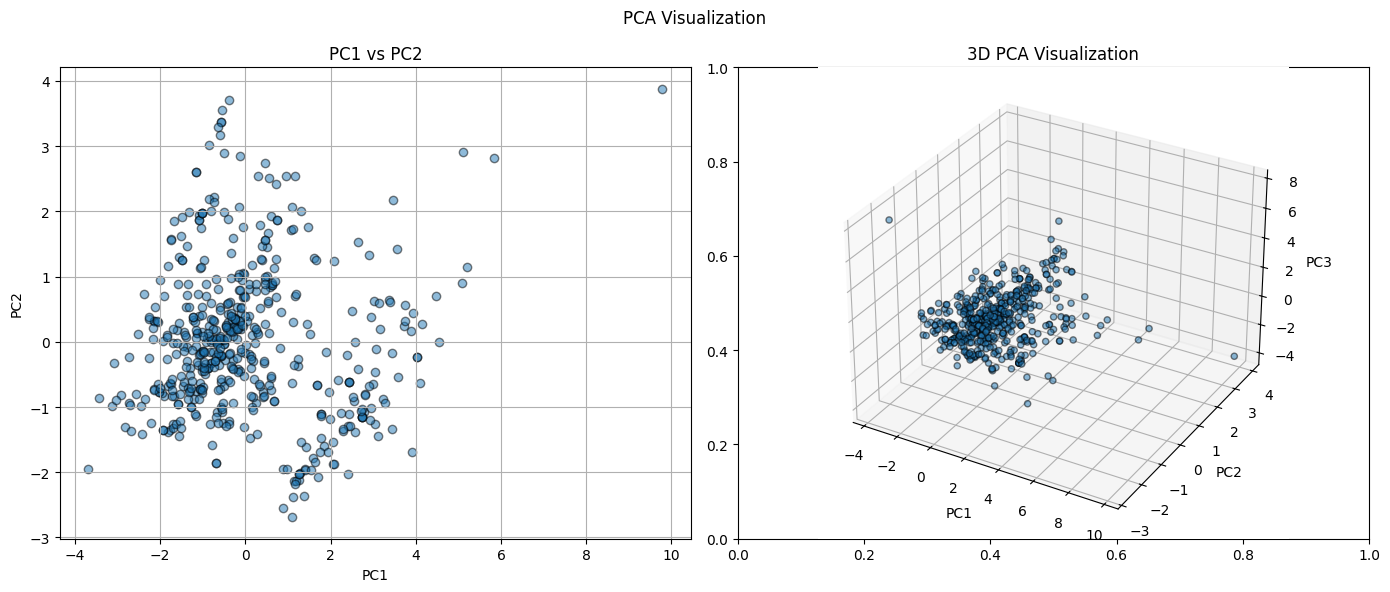

In [ ]:
from sklearn.decomposition import PCA

# PCA
def apply_pca(data, n_components=3):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data)
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
    return pca_df

pca_df = apply_pca(small_data)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': None})
fig.suptitle('PCA Visualization')

# 2D Scatter Plot (PC1 vs PC2)
axes[0].scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, edgecolor='k')
axes[0].set_title('PC1 vs PC2')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid()

# 3D Scatter Plot (PC1 vs PC2 vs PC3)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.5, edgecolor='k')
ax.set_title('3D PCA Visualization')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.tight_layout()
plt.show()
